# Sckit Learn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
#from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression#resource: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn import linear_model
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


In [4]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [5]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
X = x[:, np.newaxis]
X.shape

(50, 1)

In [6]:
model.fit(X, y)

LinearRegression()

In [7]:
model.coef_

array([1.9776566])

In [8]:
model.intercept_

-0.9033107255311164

In [9]:
reg = linear_model.LinearRegression()
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression()

In [10]:
reg.coef_

array([0.5, 0.5])

In [11]:
reg.intercept_

2.220446049250313e-16

In [12]:
import statistics

data = (21, 19, 18, 46, 30, 18, 19, 21, 18)
print(statistics.mode(data))

18


In [13]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna("G6")
train["Embarked"] = train["Embarked"].fillna("Q")
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [14]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

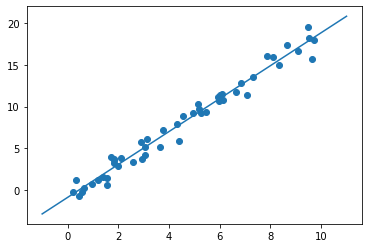

In [15]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [17]:
model.coef_

array([1.9776566])

In [18]:
model.intercept_

-0.9033107255311164

In [19]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

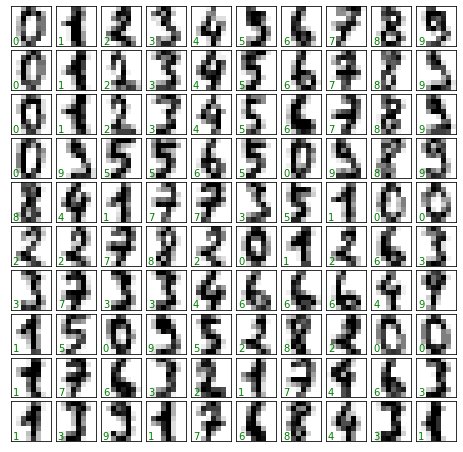

In [22]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [23]:
X = digits.data
X.shape

(1797, 64)

In [24]:
y = digits.target
y.shape

(1797,)

In [25]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

In [26]:
"""
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);"""

"\nplt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,\n            edgecolor='none', alpha=0.5,\n            cmap=plt.cm.get_cmap('spectral', 10))\nplt.colorbar(label='digit label', ticks=range(10))\nplt.clim(-0.5, 9.5);"

In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [28]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [29]:
accuracy_score(ytest, y_model)

0.8333333333333334

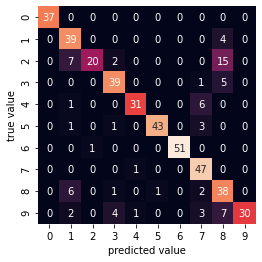

In [30]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

resource: https://www.youtube.com/watch?v=0Lt9w-BxKFQ&t=26s


        https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb
        
        https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish

Not: qcut nedir?

In [31]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

# Multiple Linear Regression

In [32]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [33]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756775
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [34]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [35]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [36]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


# Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [39]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [40]:
x_ = transformer.transform(x)

In [41]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [42]:
model = LinearRegression().fit(x_, y)

In [43]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


In [44]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
print(x_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


In [45]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [46]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498565
intercept: 0.0
coefficients: [21.37232143 -1.32357143  0.02839286]


In [47]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


# Advanced Linear Regression

In [48]:
import statsmodels.api as sm


In [2]:
x = np.array([3, 6, 8,10, 12,15, 18, 20, 22,23,25]).reshape((-1, 1))#makes it one column
y = np.array([9, 5, 12,7, 16,11, 20,14, 24, 16,26])
print(x)
print(y)
x, y = np.array(x), np.array(y)
print(x)
print(y)

NameError: name 'np' is not defined

In [50]:
x = sm.add_constant(x)

In [51]:
model = sm.OLS(y, x)

In [52]:
results = model.fit()

In [1]:
print(results.summary())

NameError: name 'results' is not defined

In [54]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)
print('predicted response:', results.fittedvalues, sep='\n')
print("*************************************************************\n")
print('predicted response:', results.predict(x), sep='\n')

coefficient of determination: 0.8615939258756777
adjusted coefficient of determination: 0.8062314962259488
regression coefficients: [5.52257928 0.44706965 0.25502548]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
*************************************************************

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [55]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]


# Titanic

resource: https://www.kaggle.com/poonaml/titanic-survival-prediction-end-to-end-ml-pipeline

https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [56]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna("G6")
train["Embarked"] = train["Embarked"].fillna("Q")
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S


In [58]:
titanic = train + test
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,56.5,NaN,SQ,15.0792,"Braund, Mr. Owen HarrisKelly, Mr. James",0.0,893.0,6.0,malemale,1.0,NaN,A/5 21171330911
1,85.0,NaN,CS,78.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,895.0,4.0,femalefemale,2.0,NaN,PC 17599363272
2,88.0,NaN,SQ,17.6125,"Heikkinen, Miss. LainaMyles, Mr. Thomas Francis",0.0,897.0,5.0,femalemale,0.0,NaN,STON/O2. 3101282240276
3,62.0,NaN,SS,61.7625,"Futrelle, Mrs. Jacques Heath (Lily May Peel)Wi...",0.0,899.0,4.0,femalemale,1.0,NaN,113803315154
4,57.0,NaN,SS,20.3375,"Allen, Mr. William HenryHirvonen, Mrs. Alexand...",1.0,901.0,6.0,malefemale,1.0,NaN,3734503101298


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#from cross_validation import KFold
# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare",
              "Embarked","NlengthD", "FsizeD", "Title","Deck"]
target="Survived"
predictions = []

In [60]:
#kf = KFold(titanic.shape[0], n_folds=3, random_state=1)


In [62]:
"""
lr = LinearRegression()
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (titanic[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = titanic[target].iloc[train]
    # Training the algorithm using the predictors and target.
    lr.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = lr.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)"""

"\nlr = LinearRegression()\nfor train, test in kf:\n    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.\n    train_predictors = (titanic[predictors].iloc[train,:])\n    # The target we're using to train the algorithm.\n    train_target = titanic[target].iloc[train]\n    # Training the algorithm using the predictors and target.\n    lr.fit(train_predictors, train_target)\n    # We can now make predictions on the test fold\n    test_predictions = lr.predict(titanic[predictors].iloc[test,:])\n    predictions.append(test_predictions)"

Medium yazısı:https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

In [63]:
import pandas as pd
xdic={'X': {11: 300, 12: 170, 13: 288, 14: 360, 15: 319, 16: 330, 17: 520, 18: 345, 19: 399, 20: 479}}
ydic={'y': {11: 305000, 12: 270000, 13: 360000, 14: 370000, 15: 379000, 16: 405000,
            17: 407500, 18: 450000, 19: 450000, 20: 485000}}
X=pd.DataFrame.from_dict(xdic)
y=pd.DataFrame.from_dict(ydic)
import numpy as np
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
         y
11  305000
12  270000
13  360000
14  370000
15  379000
16  405000
17  407500
18  450000
19  450000
20  485000


In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=9
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

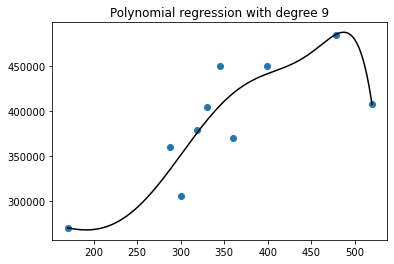

In [65]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()